In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create list of the scores you want to plot
boyscores = [32, 67, 90, 100, 92]
girlscores = [40, 74, 90, 92, 100]

In [6]:
# create a list for the periods this is the x axis
labels = ["1", "2", "3", "4", "5"]

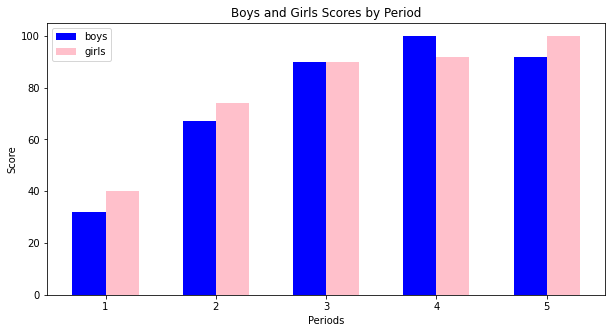

In [9]:
'''Bar Plot'''
width = 0.3
plt.figure(figsize=(10,5)) #defines plot object for us to use
plt.title('Boys and Girls Scores by Period')
plt.xlabel('Periods') #x axis label
plt.ylabel('Score') #y axis label

y_pos = np.arange(len(labels)) #y axis has to be of length equal to labels
plt.xticks(y_pos+0.15, labels) #xticks makes y_pos label same as in labels list

plt.bar(y_pos, boyscores, width=width, label='boys', color='blue', align='center')
plt.bar(y_pos+width, girlscores, width=width, label='girls', color='pink', align='center')

plt.legend(loc='best')
plt.show()

In [10]:
! curl -O https://raw.githubusercontent.com/linuxacademy/content-using-pythons-maths-science-and-engineering-libraries/master/hdi_master.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2642k  100 2642k    0     0  1835k      0  0:00:01  0:00:01 --:--:-- 1835k


In [11]:
df = pd.read_csv('hdi_master.csv')

In [12]:
'''Histogram'''
year_of_interest = 2010
df_year_interest = df[df['year'] == year_of_interest]
missing_values = df['HDI for year'].isnull()
hdi = df_year_interest['HDI for year'][~missing_values] #will load just the value

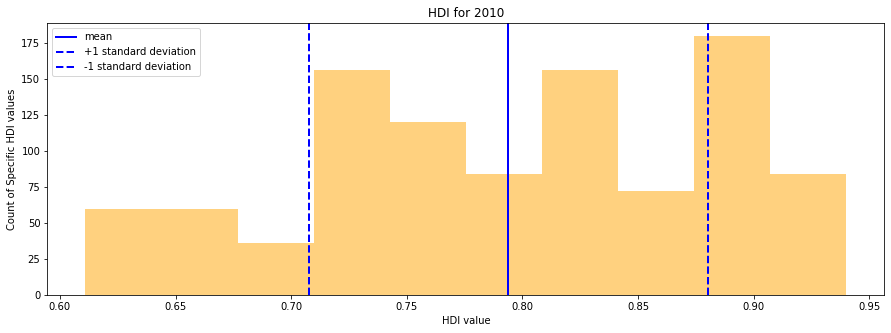

In [15]:
plt.figure(figsize=(15, 5))
plt.hist(hdi, facecolor='orange', alpha = 0.5) #aplha -s for color intensity

plt.axvline(hdi.mean(), color='b', linestyle='solid', linewidth=2, label='mean')  #axvline : axis vertical line
plt.axvline(hdi.mean() + hdi.std(), color='b', linestyle='dashed', linewidth=2, label='+1 standard deviation')
plt.axvline(hdi.mean() - hdi.std(), color='b', linestyle='dashed', linewidth=2, label='-1 standard deviation')

plt.title(f"HDI for {year_of_interest}")
plt.xlabel('HDI value')
plt.ylabel('Count of Specific HDI values')
plt.legend(loc='upper left')
plt.show()

In [20]:
#Line plots and Scatter Plots
#Suicide per 100 thousand per population
#create dataframe for male and female
df_male = df[df['sex'] == 'male'].copy()
df_female = df[df['sex'] == 'female'].copy()

#comparison on same graph
suicides_by_male = df_male['suicides/100k pop'].groupby(df['year']).mean().reset_index(level=0)
suicides_by_female = df_female['suicides/100k pop'].groupby(df['year']).mean().reset_index(level=0)

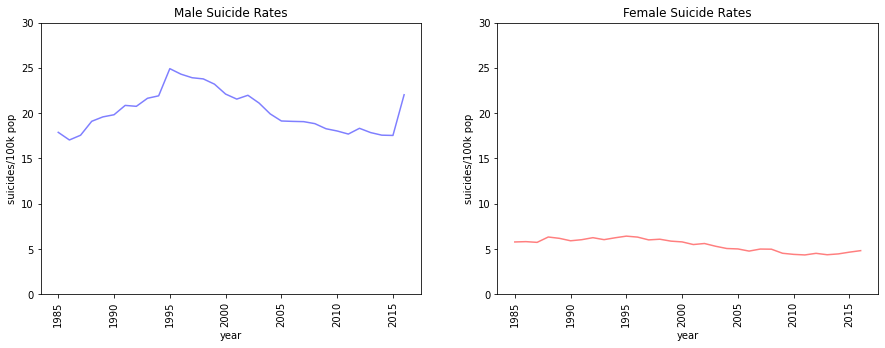

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(suicides_by_male['year'], suicides_by_male['suicides/100k pop'], color='blue', alpha=0.5)
plt.title(f'Male Suicide Rates')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.ylim([0, 30])



plt.subplot(1,2,2) #one row two columns and this plot oi for the Second spot
plt.plot(suicides_by_female['year'], suicides_by_female['suicides/100k pop'], color='red', alpha=0.5)
plt.title(f'Female Suicide Rates')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.ylim([0, 30]) #specify axis of y-axis

plt.show()

No handles with labels found to put in legend.


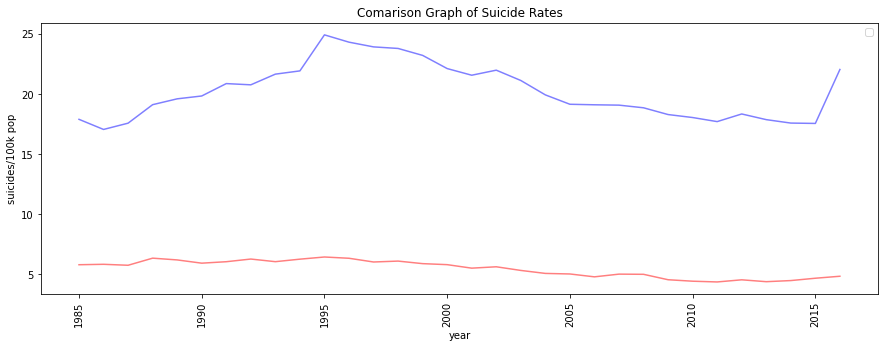

In [23]:
'''After plt.show the data has to be redifined'''
plt.figure(figsize=(15, 5))
plt.plot(suicides_by_male['year'], suicides_by_male['suicides/100k pop'], color='blue', alpha=0.5)
plt.plot(suicides_by_female['year'], suicides_by_female['suicides/100k pop'], color='red', alpha=0.5)
plt.title(f'Comarison Graph of Suicide Rates')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc = 'best')


plt.show()

In [ ]:
from csv import DictReader
from datetime import datetime

convert_bool = lambda str_val: True if str_val == "TRUE" else False

targets = []
with open("/home/cloud_user/target.csv", newline="") as f:
    reader = DictReader(f)
    for row in reader:
        try:
            row["AllCapability"] = eval(row["AllCapability"])
        except SyntaxError:
            # This happens if the field is an empty string instead of a list
            row["AllCapability"] = []

        row["Is24Hours.MF"] = convert_bool(row["Is24Hours.MF"])
        row["Is24Hours.Sat"] = convert_bool(row["Is24Hours.Sat"])
        row["Is24Hours.Sun"] = convert_bool(row["Is24Hours.Sun"])
        row["IsOpen.MF"] = convert_bool(row["IsOpen.MF"])
        row["IsOpen.Sat"] = convert_bool(row["IsOpen.Sat"])
        row["IsOpen.Sun"] = convert_bool(row["IsOpen.Sun"])
        row["LocationMilestones.OpenDate"] = datetime.strptime(
            row["LocationMilestones.OpenDate"], "%Y-%m-%dT%H:%M:%S"
        )
        targets.append(row)

# Example dictionary in targets
# {
#   "X.locale": "en-US",
#   "Address.AddressLine1": "400 Oxford Exchange Blvd",
#   "Address.AddressLine2": "",
#   "Address.City": "Oxford",
#   "Address.CountryName": "United States",
#   "Address.County": "Calhoun",
#   "Address.FormattedAddress": "400 Oxford Exchange Blvd, Oxford, AL 36203-3459",
#   "Address.IntersectionDescription": "SEC I-20 & Golden Creek Rd",
#   "Address.Latitude": "33.608825",
#   "Address.Longitude": "-85.783182",
#   "Address.PostalCode": "36203-3459",
#   "Address.Subdivision": "AL",
#   "AlternateIdentifier.ID": "T2153",
#   "ID": "2153",
#   "IsDaylightSavingsTimeRecognized": "TRUE",
#   "LocationMilestones.LastRemodelDate": "",
#   "LocationMilestones.OpenDate": "2006-07-19T12:00:00",
#   "Market": "ESE",
#   "Name": "Oxford",
#   "OperatingHours..timeFormat": "12-hour",
#   "Store.StoreDistrictID": "340",
#   "Store.StoreGroupID": "394",
#   "Store.StoreRegionID": "300",
#   "SubTypeDescription": "",
#   "TimeZone.TimeZoneCode": "CST",
#   "TimeZone.TimeZoneDescription": "Central Std Time",
#   "TimeZone.TimeZoneOffset.OffsetCode": "UTC",
#   "TimeZone.TimeZoneOffset.OffsetHours": "-6",
#   "TypeCode": "STR",
#   "PhoneNumber": "(256) 231-2900",
#   "FaxNumber": "(256) 231-2910",
#   "BeginTime.MF": "8:00:00",
#   "Is24Hours.MF": false,
#   "IsOpen.MF": true,
#   "Summary.MF": "8:00 a.m.-10:00 p.m.",
#   "ThruTime.MF": "22:00:00",
#   "BeginTime.Sat": "8:00:00",
#   "Is24Hours.Sat": false,
#   "IsOpen.Sat": true,
#   "Summary.Sat": "8:00 a.m.-11:00 p.m.",
#   "ThruTime.Sat": "23:00:00",
#   "BeginTime.Sun": "8:00:00",
#   "Is24Hours.Sun": false,
#   "IsOpen.Sun": true,
#   "Summary.Sun": "8:00 a.m.-10:00 p.m.",
#   "ThruTime.Sun": "22:00:00",
#   "AllCapability": [
#     "CVS pharmacy",
#     "Caf\u00e9",
#     "Mobile Kiosk",
#     "Starbucks",
#     "Wine & Beer Available"
#   ]
# }

# 1) Create Bar Graph Showing Number of Stores by State/Subdivision
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby

subdivision_counts = {}
for subdiv, group in groupby(targets, lambda t: t["Address.Subdivision"]):
    if not subdivision_counts.get(subdiv):
        subdivision_counts[subdiv] = sum(1 for _ in group)
    else:
        subdivision_counts[subdiv] += sum(1 for _ in group)

subdivisions = sorted(subdivision_counts.keys())
values = [subdivision_counts[key] for key in subdivisions]

fig, ax = plt.subplots()
ax.barh(subdivisions, values)
ax.set_xlabel("Number of Stores")
ax.set_ylabel("State")
ax.set_yticklabels(subdivisions, fontsize=4)
ax.invert_yaxis()
ax.set_title("Stores by State")
fig.show()
# 2) Create Line Graph Showing the Number of Stores Opened Each Year
stores_open_by_year = {}
for year, group in groupby(targets, lambda t: t["LocationMilestones.OpenDate"].year):
    if not stores_open_by_year.get(year):
        stores_open_by_year[year] = sum(1 for _ in group)
    else:
        stores_open_by_year[year] += sum(1 for _ in group)

years = sorted(stores_open_by_year.keys())
values = [stores_open_by_year[year] for year in years]

fig2, ax = plt.subplots()
ax.plot(years, values)
ax.set_xlabel("Year")
ax.set_ylabel("Number of New Stores")
ax.set_title("New Stores Opened by Year")
fig2.show()
# 3) Create a Line Graph Showing the change in total number of Target Stores over time
total = 0
total_by_year = []
for year in years:
    stores_opened = stores_open_by_year[year]
    total += stores_opened
    total_by_year.append(total)

fig3, ax = plt.subplots()
ax.plot(years, total_by_year)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Stores")
ax.set_title("Number of Stores Over Time")
fig3.show()
